# Smoke Haze Plan Biggy

![Smoke Haze Plan Biggy](https://66.media.tumblr.com/0cd25b386bee619b4fa4d52f2f67addd/tumblr_p3ih1912ZU1wks6iyo2_r1_500.gifv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('data/adult.csv')

In [3]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
dataset[dataset == '?'] = np.nan
dataset.isnull().sum()

C:\Users\habab\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
index = ['occupation', 'workclass', 'native.country']
for index_n in index:
    dataset[index_n].fillna(dataset[index_n].mode()[0], inplace=True)

In [7]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
index = list(dataset.select_dtypes(['object']).columns.values)
index.pop(-1)

'income'

In [11]:
for objects in index:
    dataset[objects] = encoder.fit_transform(dataset[objects])

In [12]:
labe_ec = LabelEncoder()
dataset['income'] = labe_ec.fit_transform(dataset['income'])
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0


In [13]:
data_x = dataset.drop('income', 1)
data_y = dataset['income']

In [14]:
scale = StandardScaler()
data_x = pd.DataFrame(scale.fit_transform(data_x), columns=data_x.columns)

In [15]:
data_x

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,-0.085296,1.140460,1.214869,-0.031360,0.921634,0.971958,-0.277805,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.26137
32557,-0.849080,-0.085296,0.639741,-0.852205,0.746039,-0.406212,1.475401,2.211698,0.393668,-1.422331,-0.14592,-0.216660,-0.197409,0.26137
32558,0.103983,-0.085296,-0.335433,0.181332,-0.420060,-0.406212,-0.034928,-0.900181,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.26137
32559,1.423610,-0.085296,-0.358777,0.181332,-0.420060,2.249480,-1.545256,1.589322,0.393668,-1.422331,-0.14592,-0.216660,-0.035429,0.26137


In [16]:
data_y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state = 40)

In [19]:
x_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
22807,0.323921,-1.891692,-0.922841,0.439716,1.523438,-0.406212,0.720237,2.211698,-1.962621,-1.422331,-0.14592,-0.21666,-0.440378,0.26137
7240,0.543859,2.624298,-0.787065,0.439716,1.523438,0.921634,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,-0.21666,-0.197409,0.26137
18266,-0.335892,-0.085296,0.493675,0.181332,-0.420060,-0.406212,1.727122,-0.900181,0.393668,0.703071,-0.14592,-0.21666,0.369519,0.26137
32556,-1.215643,-0.085296,1.140460,1.214869,-0.031360,0.921634,0.971958,-0.277805,0.393668,0.703071,-0.14592,-0.21666,-0.035429,0.26137
14359,-1.142331,-1.891692,0.930471,-0.335437,1.134739,0.921634,0.720237,-0.277805,0.393668,0.703071,-0.14592,-0.21666,-0.035429,0.26137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27640,-0.042642,0.817902,1.160166,1.214869,-0.031360,-0.406212,1.223679,-0.900181,0.393668,0.703071,-0.14592,-0.21666,0.774468,0.26137
14501,-0.262580,2.624298,0.555154,1.214869,-0.031360,-1.734058,-1.545256,1.589322,-1.962621,-1.422331,-0.14592,-0.21666,-0.035429,0.26137
30727,-0.702455,-0.085296,0.020433,0.181332,-0.420060,0.921634,0.720237,-0.277805,0.393668,0.703071,-0.14592,-0.21666,-0.035429,0.26137
14555,-0.042642,-0.085296,-1.278678,-0.593821,0.357340,-0.406212,-1.041813,-0.900181,0.393668,0.703071,-0.14592,-0.21666,-0.035429,0.26137


In [20]:
x_train.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
age,1.000000,0.046052,-0.079351,-0.009073,0.035522,-0.260704,-0.002822,-0.263769,0.026341,0.086292,0.079887,0.063467,0.063099,-0.004224
workclass,0.046052,1.000000,-0.023634,0.008791,0.009099,-0.018398,0.008666,-0.058779,0.047251,0.068354,0.033576,0.004701,0.035298,-0.006550
fnlwgt,-0.079351,-0.023634,1.000000,-0.029658,-0.041205,0.029146,-0.000027,0.007298,-0.018526,0.028119,-0.003100,-0.008912,-0.017463,-0.060801
education,-0.009073,0.008791,-0.029658,1.000000,0.360780,-0.039483,-0.036256,-0.011257,0.013312,-0.025716,0.028458,0.027775,0.058936,0.082555
education.num,0.035522,0.009099,-0.041205,0.360780,1.000000,-0.071671,0.073993,-0.089787,0.025143,0.012263,0.117632,0.086386,0.150131,0.092267
marital.status,-0.260704,-0.018398,0.029146,-0.039483,-0.071671,1.000000,0.034025,0.185566,-0.071807,-0.126718,-0.044431,-0.042476,-0.191886,-0.017876
occupation,-0.002822,0.008666,-0.000027,-0.036256,0.073993,0.034025,1.000000,-0.041468,-0.006729,0.052070,0.016362,0.003807,-0.011851,-0.007811
relationship,-0.263769,-0.058779,0.007298,-0.011257,-0.089787,0.185566,-0.041468,1.000000,-0.117875,-0.581133,-0.059484,-0.058955,-0.242478,-0.011344
race,0.026341,0.047251,-0.018526,0.013312,0.025143,-0.071807,-0.006729,-0.117875,1.000000,0.084667,0.007921,0.016570,0.041312,0.113471
sex,0.086292,0.068354,0.028119,-0.025716,0.012263,-0.126718,0.052070,-0.581133,0.084667,1.000000,0.050035,0.041763,0.226228,0.007771


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
regressor = LogisticRegression()

In [23]:
regressor.fit(x_train, y_train)
predict = regressor.predict(x_train)
regressor.score(x_train, y_train)

0.8242365742365743

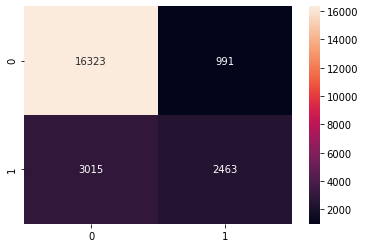

In [24]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, predict), annot=True, fmt='d')

In [25]:

predict = regressor.predict(x_test)
regressor.score(x_test, y_test)

0.8252635889036749

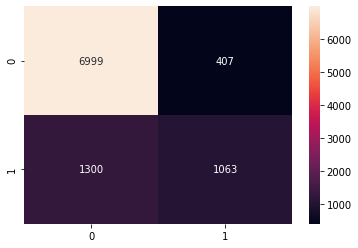

In [26]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d')

# trying Other Models

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
naive = GaussianNB()
support_vector = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(criterion='entropy')

In [29]:
naive.fit(x_train, y_train)
naive.score(x_train, y_train)

0.806905931905932

In [30]:
support_vector.fit(x_train, y_train)
support_vector.score(x_train, y_train)

0.8588978588978589

In [31]:
support_vector.score(x_test, y_test)

0.8459412427065206

In [32]:
tree.fit(x_train, y_train)
tree.score(x_train, y_train)

1.0

In [33]:
tree.score(x_test, y_test)

0.8100112601085065

In [34]:
forest.fit(x_train, y_train)
forest.score(x_train, y_train)

0.999956124956125

In [35]:
forest.score(x_test, y_test) * 100

85.29020370559934

In [36]:
#  Lets try Support Vector & Forest

In [38]:
new_x_train = x_train.drop(['native.country', 'hours.per.week'], 1)
new_x_test = x_test.drop(['native.country', 'hours.per.week'], 1)

In [39]:
new_svc = SVC().fit(new_x_train, y_train)
new_svc.score(new_x_train, y_train)

0.8525798525798526

In [40]:
new_svc.score(new_x_test, y_test)

0.8444057733647251

In [42]:
new_forest = RandomForestClassifier(criterion='entropy').fit(new_x_train, y_train)

In [44]:
new_forest.score(new_x_test, y_test)

0.8491145460128979

# Random Forest Classifier 85 % Score

In [45]:
"""
Kernel Author: Habab
Dataset: https://www.kaggle.com/uciml/adult-census-income

"""

'\nKernel Author: Habab\nDataset: https://www.kaggle.com/uciml/adult-census-income\n\n'